# 200366E      MADUSAN A.K.C.S.
# EN3160 Assignment 
# Intensity Transformations and Neighborhood Filtering


Question 1

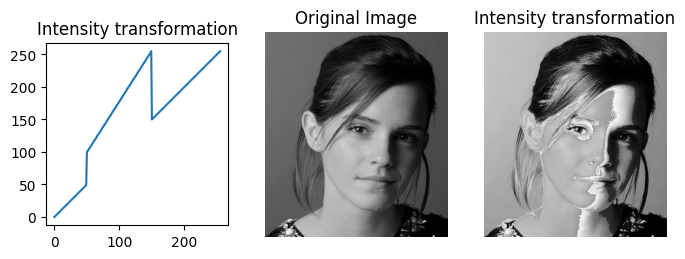

In [69]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img= cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None
t1=np.linspace(0,50,50)
t2=np.linspace(50,100,0)
t3=np.linspace(100,255,100)
t4=np.linspace(255,150,0)
t5=np.linspace(150,255,106)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
assert len(t) == 256
g=cv.LUT(img,t)
fig, ax= plt.subplots(1,3,figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformation")
plt.show()

Question 2

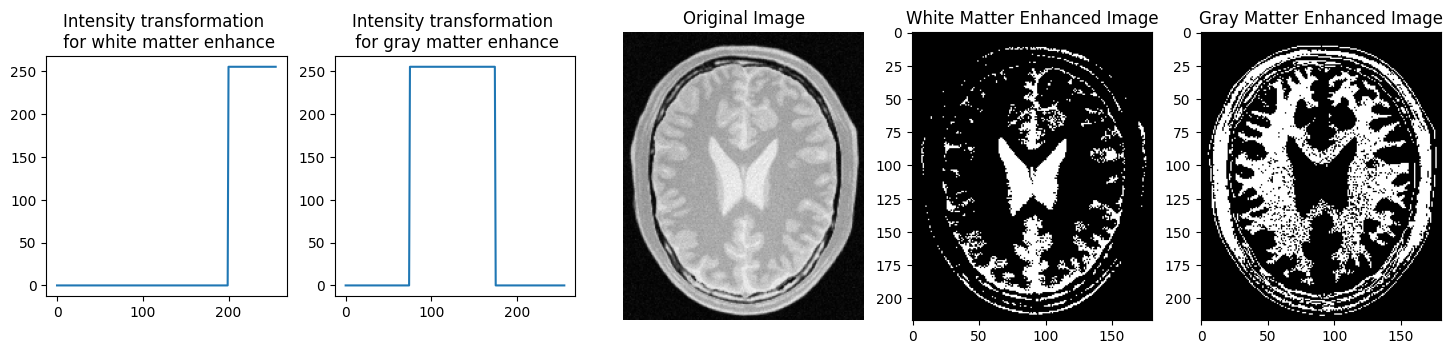

In [84]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img= cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert img is not None

t1=np.zeros(200)
t2=255*np.ones(56)
t= np.concatenate((t1,t2),axis=0).astype(np.uint8)

t3=np.zeros(75)
t4=255*np.ones(100)
t5=np.zeros(81)
T= np.concatenate((t3,t4,t5),axis=0).astype(np.uint8)

assert len(t) == 256
g=cv.LUT(img,t)
h=cv.LUT(img,T)

fig ,  ax=plt.subplots(1,5,figsize=(18,18))
ax[0].plot(t), ax[0].set_title("Intensity transformation \n for white matter enhance"), ax[0].set_aspect('equal')
ax[1].plot(T), ax[1].set_title("Intensity transformation \n for gray matter enhance") , ax[1].set_aspect('equal')
ax[2].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Original Image")
ax[3].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[3].set_title("White Matter Enhanced Image")
ax[4].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[4].set_title("Gray Matter Enhanced Image")
plt.show()


Question  3

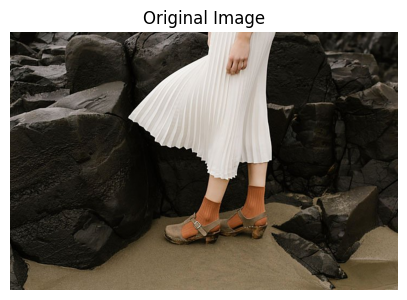

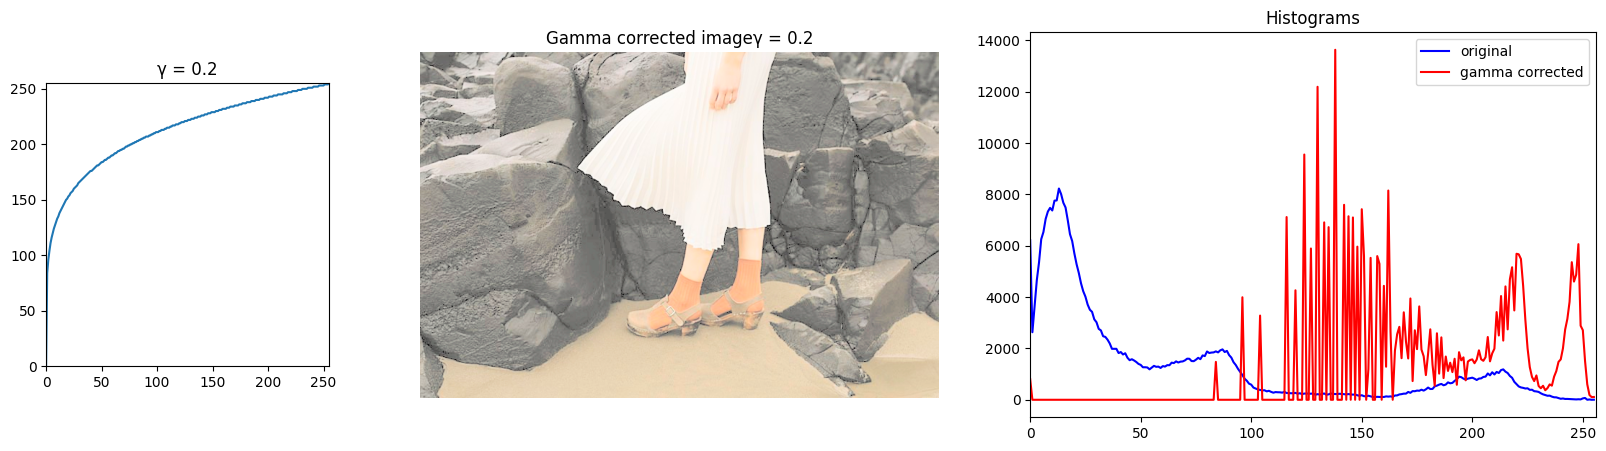

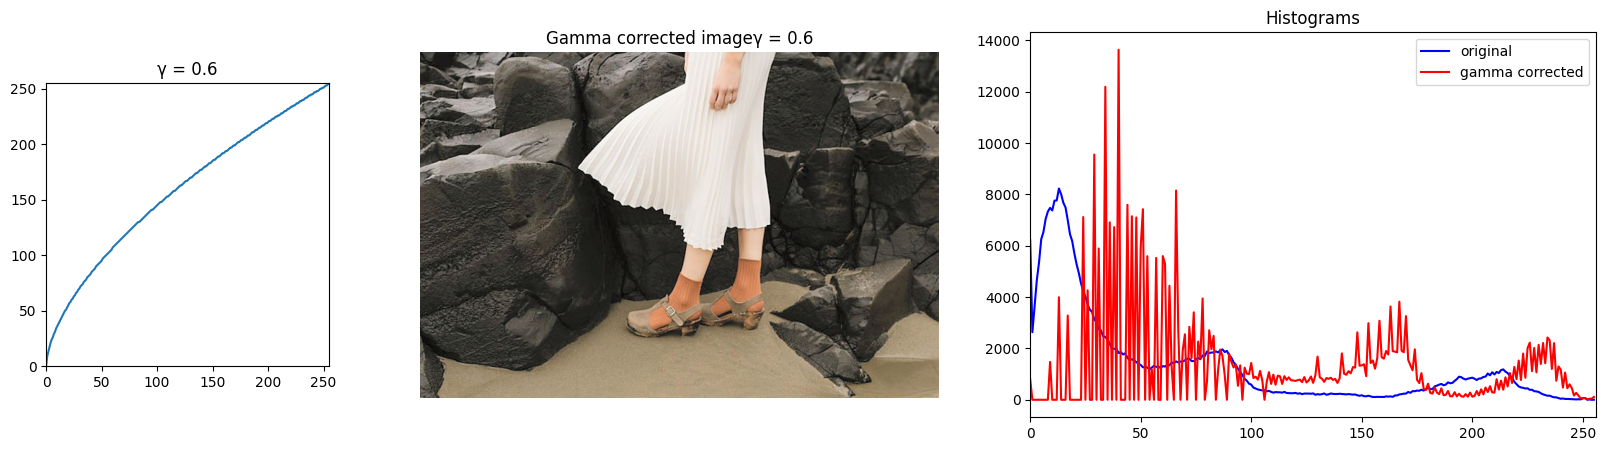

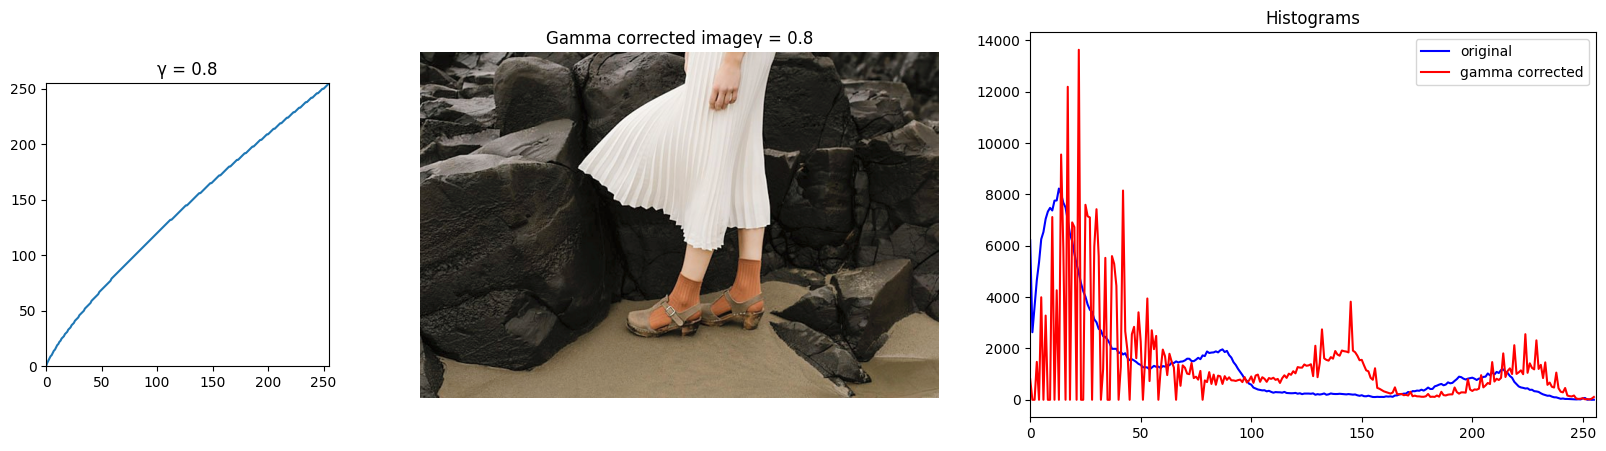

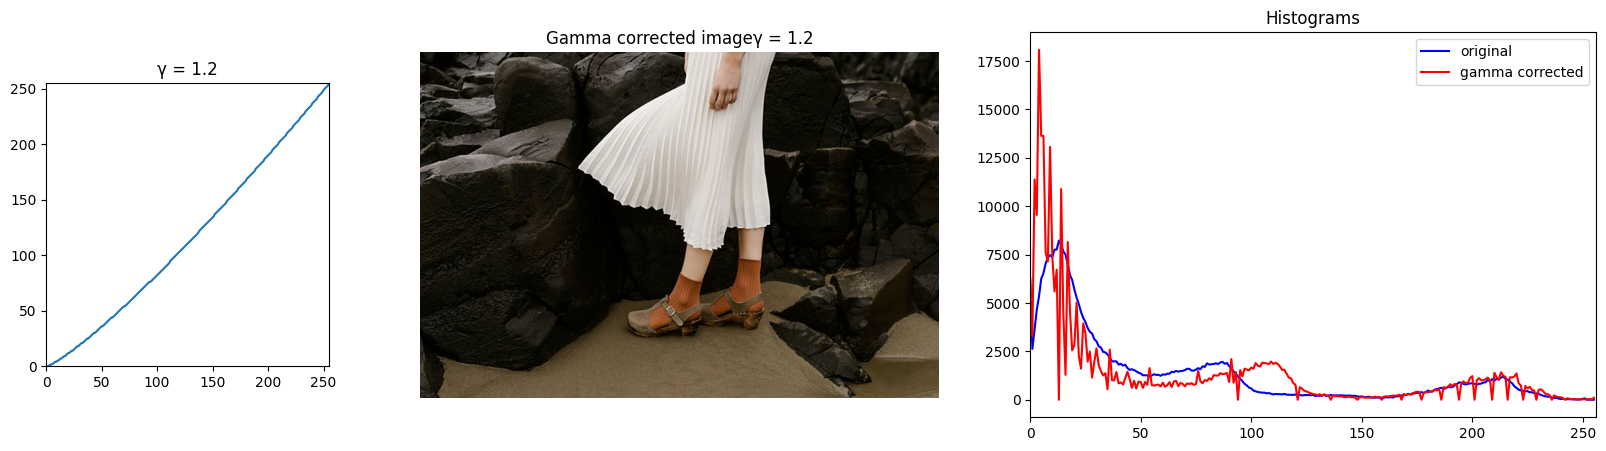

In [73]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))
gamma = [0.2, 0.6, 0.8, 1.2]
plt.figure(figsize=(5, 5)) ,plt.imshow(cv.cvtColor(img,cv.COLOR_RGB2BGR))  ,plt.axis('off') ,plt.title("Original Image") 

for i in gamma :
    table = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    img_gamma = cv.LUT(L, table)
    corrected_img = cv.merge([img_gamma, a, b])
    hist_orig = cv.calcHist([img], [0], None, [256], [0, 256])
    hist_gamma = cv.calcHist([corrected_img], [0], None, [256], [0, 256])

    fig, ax = plt.subplots(1, 3, figsize=(20, 5), gridspec_kw={'width_ratios': [0.6, 1.1, 1.2]})
    ax[0].plot(table),ax[0].set_title("\u03B3 = "+ str(i)) ,ax[0].set_xlim(0, 255),ax[0].set_ylim(0, 255),ax[0].set_aspect('equal')
    ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB)), ax[1].axis('off'), ax[1].set_title("Gamma corrected image"+"\u03B3 = "+ str(i))
    ax[2].plot(hist_orig, color='b'),  plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper right')
    ax[2].plot(hist_gamma, color='r'),  plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper right') ,ax[2].set_title("Histograms")
    

When gamma value is equal to 1, it gives the same image as the original image. But when gamma value is less than 1 and decreasing, it increases the brighness of the image. Likewise while the gamma value is greater than 1 and increasing it increases the darkness of the original image. We can see this behaviour through the plotted histograms as well. The histogram of the gamma corrected image moves to the left side of the plot due to the increase in the dark intensities of the original image with the increasing gamma value.

Question  4

105.04056099529083


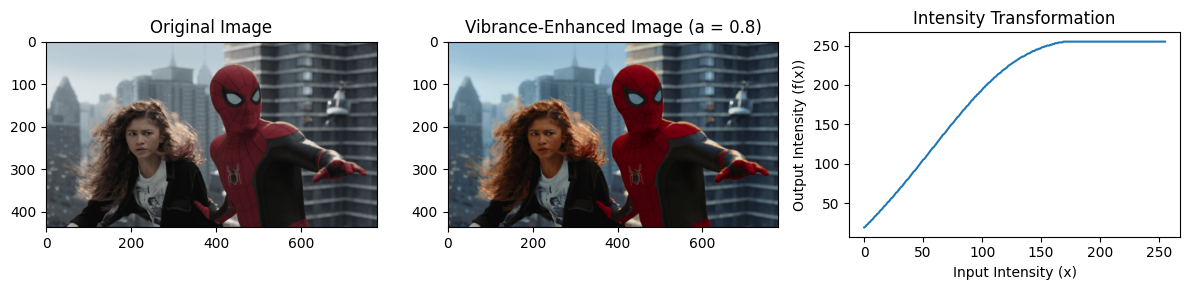

In [16]:
import cv2 as cv
import math
import numpy as np
import matplotlib.pyplot as plt
img_orig = cv.imread('spider.png', cv.IMREAD_COLOR)
img1=cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
assert img1 is not None
def transform(x, a, sigma):
    return min(x+(a*128)*np.exp(-((x-128)**2)/(2*(sigma**2))),255)
a=0.8
table = np.array([transform(i,0.8,70)for i in np.arange(0, 256)]).astype('uint8')
s_t=cv.LUT(s,table)
s_t_resized = cv.resize(s_t, (h.shape[1], h.shape[0]))
image_merge = cv.merge([h, s_t_resized, v])
img_rgb = cv.cvtColor(image_merge, cv.COLOR_HSV2RGB)
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title("Vibrance-Enhanced Image (a = {})".format(a))

# Visualize the intensity transformation
x = np.arange(256) 
plt.subplot(1, 3, 3)
plt.plot(x,table)
plt.title("Intensity Transformation")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output Intensity (f(x))")

plt.tight_layout()
plt.show()

Question  5

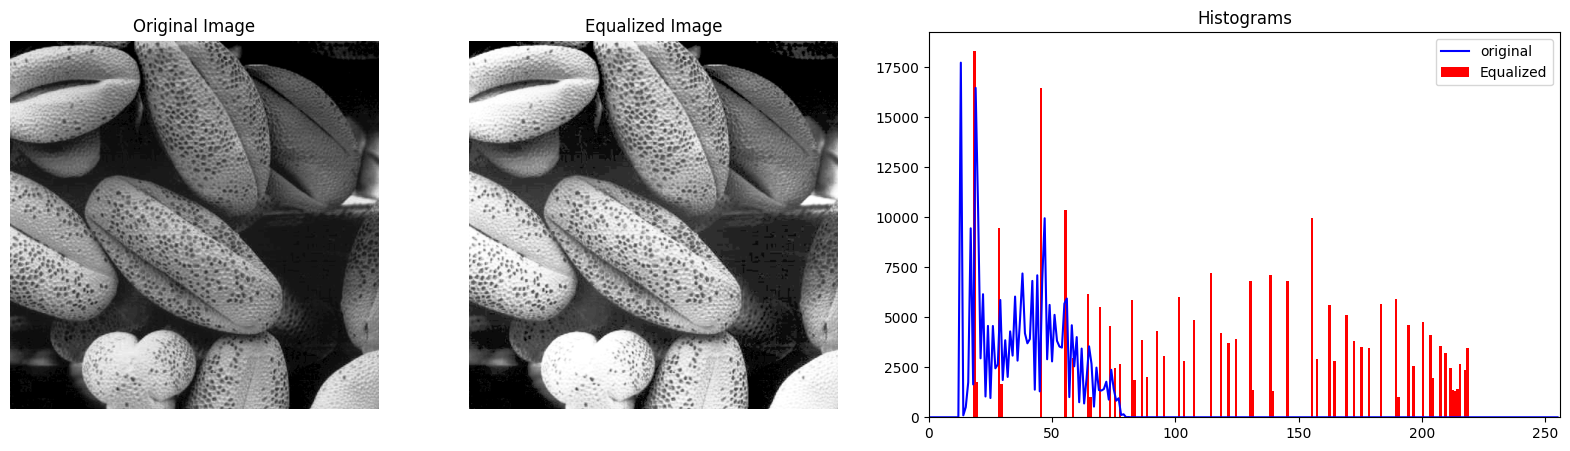

In [140]:
import numpy as np
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib
import cv2 as cv
img_org= cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)
img = cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)
hist_orig = cv.calcHist([img], [0], None, [256], [0, 256])

rows = img.shape[0] 
cols = img.shape[1]
arr1 = np.zeros((256,), dtype=np.uint16)
arr2 = np.zeros((256,), dtype=np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        arr1[g] += 1

for i in range(256):
    for j in range(i+1):
        arr2[i] += arr1[j]*(255/(rows*cols))
    arr2[i] = round(arr2[i],0)
arr2 = arr2.astype(np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        img[i,j] = arr2[g]

fig, ax = plt.subplots(1, 3, figsize=(20, 5), gridspec_kw={'width_ratios': [0.7, 0.7, 1.2]})
ax[0].imshow(img_org, cmap='gray')   ,ax[0].axis('off'),ax[0].set_title("Original Image")
ax[1].imshow(img, cmap='gray')   ,ax[1].axis('off'),ax[1].set_title("Equalized Image")
ax[2].plot(hist_orig, color='b'),ax[2].set_xlim([0, 256]),ax[2].legend(('original', 'Equalized'), loc='upper right')   ,ax[2].set_title("Histograms")
ax[2].hist(img.flatten(), 256, [0, 256], color='r')   ,ax[2].set_xlim([0, 256]),ax[2].legend(('original', 'Equalized'), loc='upper right')
plt.show()  


Question  6

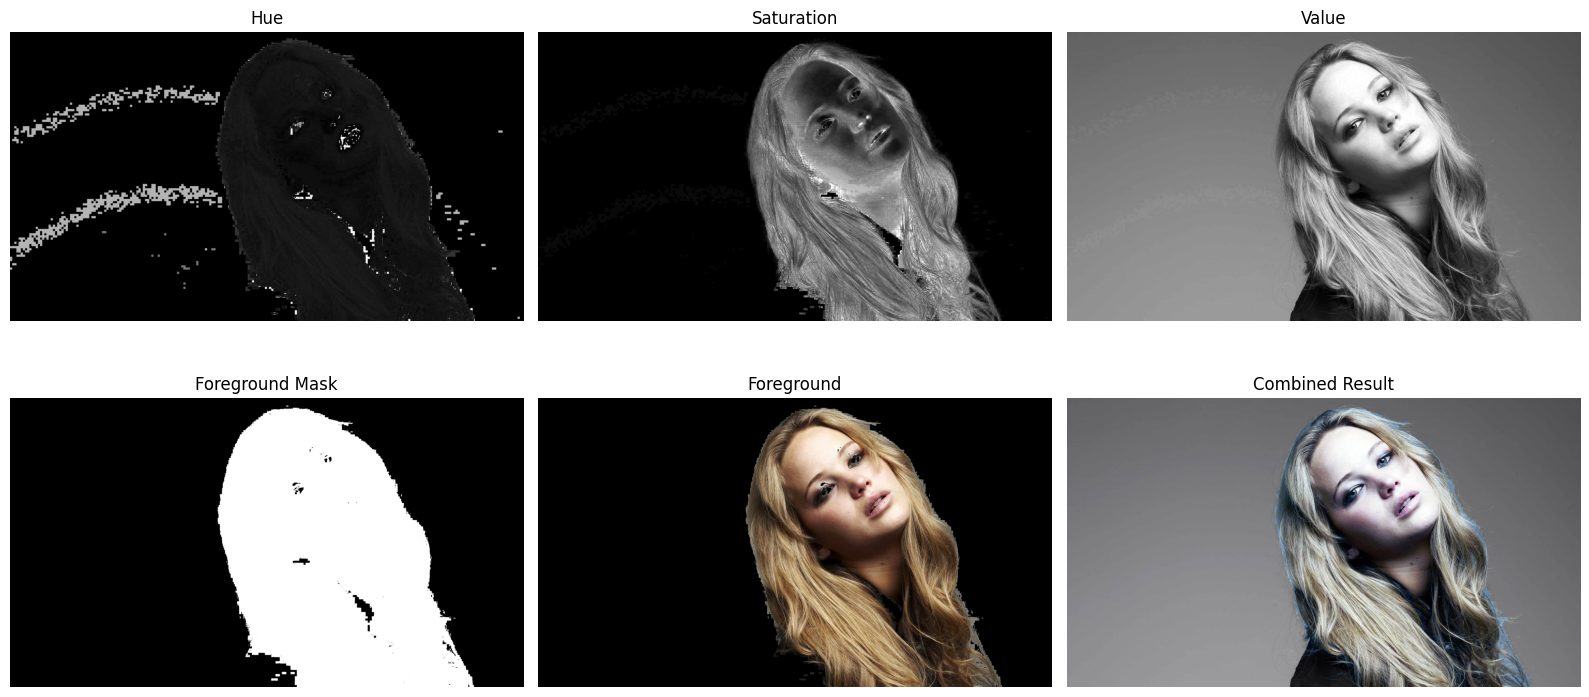

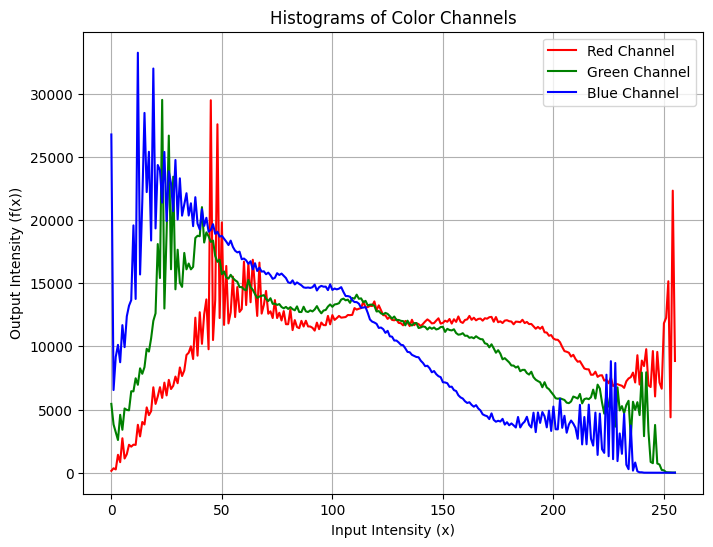

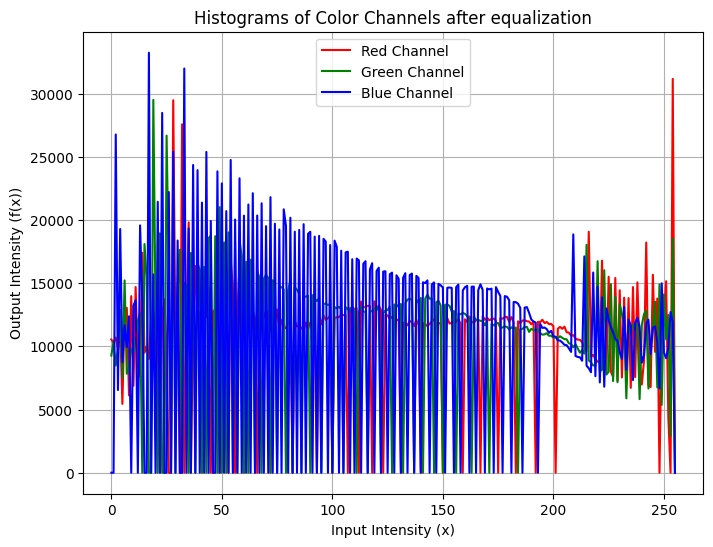

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)

hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
_, mask_fore = cv.threshold(s, 14, 255, cv.THRESH_BINARY)
img_fore = cv.bitwise_and(img_orig, img_orig, mask=mask_fore)
img_fore1 = cv.cvtColor(img_fore, cv.COLOR_BGR2RGB)

hist_fore_b = cv.calcHist([img_fore], [0], mask_fore, [256], [0, 256])
hist_fore_g = cv.calcHist([img_fore], [1], mask_fore, [256], [0, 256])
hist_fore_r = cv.calcHist([img_fore], [2], mask_fore, [256], [0, 256])
x=np.arange(256).astype('uint8')


cumsum_hist_fore_b = np.cumsum(hist_fore_b)
cumsum_hist_fore_g = np.cumsum(hist_fore_g)
cumsum_hist_fore_r = np.cumsum(hist_fore_r)

b_equ = (cumsum_hist_fore_b * 255 / cumsum_hist_fore_b[-1]).astype(np.uint8)
g_equ = (cumsum_hist_fore_g * 255 / cumsum_hist_fore_g[-1]).astype(np.uint8)
r_equ = (cumsum_hist_fore_r * 255 / cumsum_hist_fore_r[-1]).astype(np.uint8)

equalized_b = cv.LUT(img_fore[:, :, 0], b_equ)
equalized_g = cv.LUT(img_fore[:, :, 1], g_equ)
equalized_r = cv.LUT(img_fore[:, :, 2], r_equ)
hist_fore_b_equ = cv.calcHist([equalized_b], [0], mask_fore, [256], [0, 256])
hist_fore_g_equ = cv.calcHist([equalized_g], [0], mask_fore, [256], [0, 256])
hist_fore_r_equ = cv.calcHist([equalized_r], [0], mask_fore, [256], [0, 256])


equalized_foreground_bgr = cv.merge((equalized_b, equalized_g, equalized_r))
mask_bg = cv.bitwise_not(mask_fore)
background = cv.bitwise_and(img_orig, img_orig, mask=mask_bg)
result_image = cv.add(background, equalized_foreground_bgr)
result_image = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask_fore, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_fore1)
plt.title('Foreground')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(result_image)
plt.title('Combined Result')
plt.axis('off')

plt.tight_layout()
plt.show()
#plot histograms of before equalization of 3 channels in the same plot
plt.figure(figsize=(8, 6))
plt.plot(x, hist_fore_r, color='red', label='Red Channel')
plt.plot(x, hist_fore_g, color='green', label='Green Channel')
plt.plot(x, hist_fore_b, color='blue', label='Blue Channel')
plt.title("Histograms of Color Channels")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output Intensity (f(x))")
plt.legend()
plt.grid()
plt.show()
#plot histograms of after equalization of 3 channels in the same plot
plt.figure(figsize=(8, 6))
plt.plot(x, hist_fore_r_equ, color='red', label='Red Channel')
plt.plot(x, hist_fore_g_equ, color='green', label='Green Channel')
plt.plot(x, hist_fore_b_equ, color='blue', label='Blue Channel')
plt.title("Histograms of Color Channels after equalization")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output Intensity (f(x))")
plt.legend()
plt.grid()
plt.show()

Question  7

(<matplotlib.image.AxesImage at 0x2acc32ce1d0>,
 Text(0.5, 1.0, 'Gradiant Magnitude'))

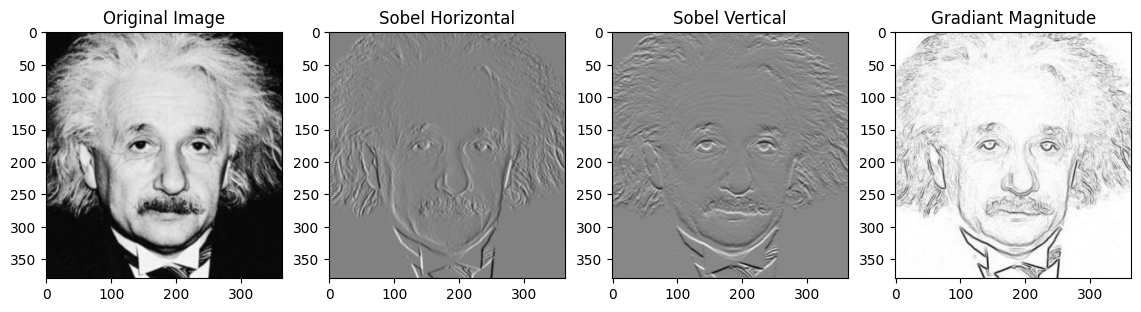

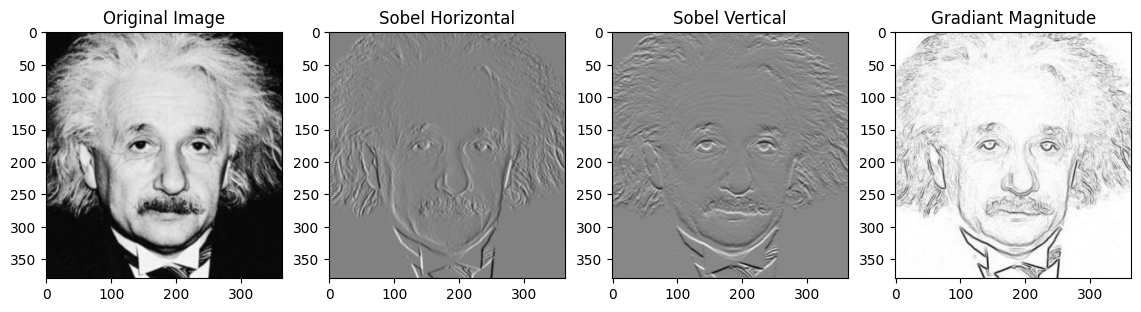

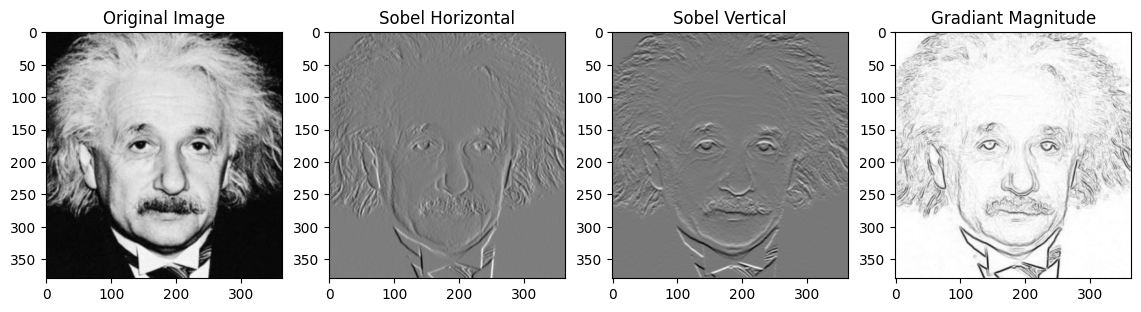

In [37]:
# Question 7 (a)
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread("einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
transform = np.arange(255, -1, -1).astype('uint8')
H_So = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
V_So = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
Mag_Gradient1 = np.sqrt(H_So**2+V_So**2)
Mag_Gradient1 = cv.normalize(Mag_Gradient1, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
Mag_Gradient= cv.LUT(Mag_Gradient1, transform)
fig , ax= plt.subplots(1,4,figsize=(14,5))
ax[0].imshow(img,cmap="gray"), ax[0].set_title('Original Image')
ax[1].imshow(H_So,cmap="gray"),ax[1].set_title('Sobel Horizontal')
ax[2].imshow(V_So,cmap="gray"),ax[2].set_title('Sobel Vertical')
ax[3].imshow(Mag_Gradient,cmap="gray"),ax[3].set_title('Gradiant Magnitude')

# Question 7 (b)
kernel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype='float')
kernel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype='float')
imh=cv.filter2D(img,-1,kernel_h)
imv=cv.filter2D(img,-1,kernel_v)
Mag_Gradient2 = np.sqrt(H_So**2+V_So**2)
Mag_Gradient2 = cv.normalize(Mag_Gradient2, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
Mag_gradient= cv.LUT(Mag_Gradient2, transform)
fig , ax= plt.subplots(1,4,figsize=(14,5))
ax[0].imshow(img,cmap="gray"), ax[0].set_title('Original Image')
ax[1].imshow(imh,cmap="gray"),ax[1].set_title('Sobel Horizontal')
ax[2].imshow(imv,cmap="gray"),ax[2].set_title('Sobel Vertical')
ax[3].imshow(Mag_gradient,cmap="gray"),ax[3].set_title('Gradiant Magnitude')

# Question 7 (c)
kernel_v=np.array([1,2,1],dtype='float')
kernel_h=np.array([1,0,-1],dtype='float')
imh=cv.sepFilter2D(img,-1,kernel_h,kernel_v)
imv=cv.sepFilter2D(img,-1,kernel_v,kernel_h)
Mag_Gradient2 = np.sqrt(H_So**2+V_So**2)
Mag_Gradient2 = cv.normalize(Mag_Gradient2, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
Mag_gradient= cv.LUT(Mag_Gradient2, transform)
fig , ax= plt.subplots(1,4,figsize=(14,5))
ax[0].imshow(img,cmap="gray"), ax[0].set_title('Original Image')
ax[1].imshow(imh,cmap="gray"),ax[1].set_title('Sobel Horizontal')
ax[2].imshow(imv,cmap="gray"),ax[2].set_title('Sobel Vertical')
ax[3].imshow(Mag_gradient,cmap="gray"),ax[3].set_title('Gradiant Magnitude')


Question  8

SSD for nearest neighbor interpolation: 40.11174270190329
SSD for bilinear interpolation: 35.98375321502058


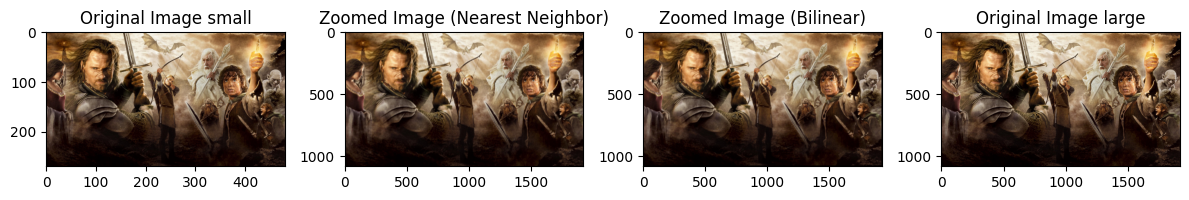

SSD for nearest neighbor interpolation: 16.792970920138888
SSD for bilinear interpolation: 14.256099826388889


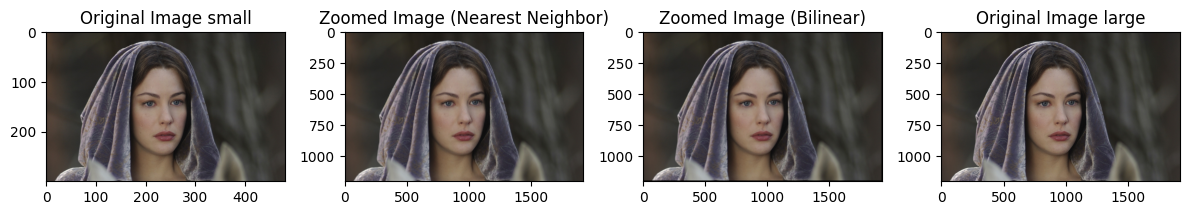

SSD for nearest neighbor interpolation: 54.603041956018515
SSD for bilinear interpolation: 52.59580367476852


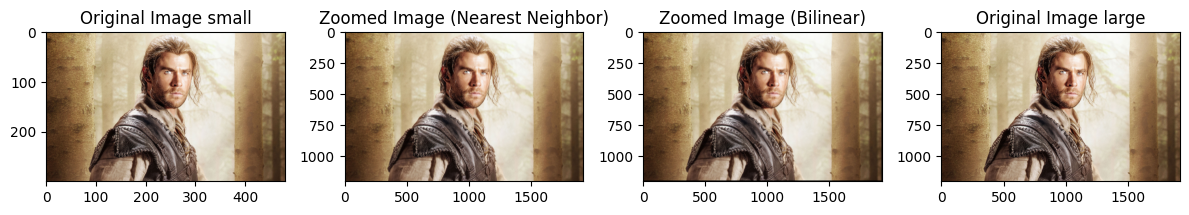

SSD for nearest neighbor interpolation: 81.75742818447787
SSD for bilinear interpolation: 80.34955383551954


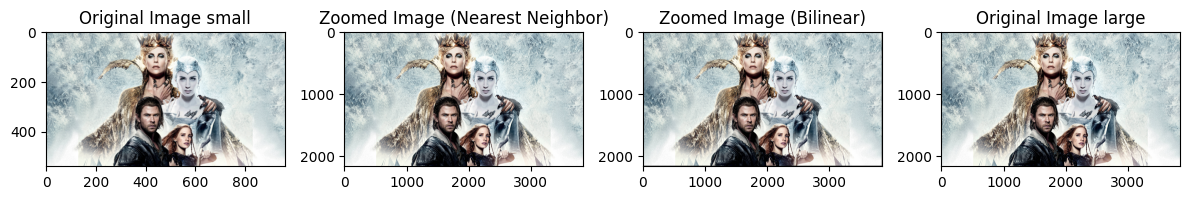

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nearest_neighbor(img, zoom_factor):
    x, y, num_channels = img.shape
    x_new = int(x * zoom_factor)
    y_new = int(y * zoom_factor)
    new_image = np.zeros((x_new, y_new, num_channels), dtype=np.uint8)
    for i in range(x_new):
        for j in range(y_new):
            x1 = min(int(round(i / zoom_factor)), x - 1)
            y1 = min(int(round(j / zoom_factor)), y - 1)
            new_image[i, j, :] = img[x1, y1, :]
    return new_image

def bilinear_interpolation(img, zoom_factor):
    x, y, num_channels = img.shape
    x_new = int(x * zoom_factor)
    y_new = int(y * zoom_factor)
    new_image = np.zeros((x_new, y_new, num_channels), dtype=np.float32)
    for i in range(x_new):
        for j in range(y_new):
            x1 = i / zoom_factor
            x1_int = int(i / zoom_factor)
            x2 = x1_int + 1
            y1 = int(j / zoom_factor)
            y1_int = int(j / zoom_factor)
            y2 = y1_int + 1
            if x2 >= x:
                x2 = x1_int
            if y2 >= y:
                y2 = y1_int
            h1 = (x2 - x1) * img[x1_int, y1_int, :] + (x1 - x1_int) * img[x2, y1_int, :]
            h2 = (x2 - x1) * img[x1_int, y2, :] + (x1 - x1_int) * img[x2, y2, :]
            new_image[i, j, :] = (y2 - y1) * h1 + (y1 - y1_int) * h2
    return new_image.astype(np.uint8)

def zooming(img, zoom_factor, interpolation):
    if interpolation == 'nearest':
        return nearest_neighbor(img, zoom_factor)
    elif interpolation == 'bilinear':
        return bilinear_interpolation(img, zoom_factor)
    else:
        raise ValueError("Unknown interpolation method: {}".format(interpolation))



zoom_factor = 4
img_small_paths = ["im01small.png", "im02small.png", "im05small.png", "im04small.png"]
zoomed_outs_paths = ["im01.png", "im02.png", "im05.png", "im04.png"]

for i in range(4):
    img_small = cv2.imread(img_small_paths[i], cv2.IMREAD_COLOR)
    img_large = cv2.imread(zoomed_outs_paths[i], cv2.IMREAD_COLOR)
    img_small_1 = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)
    img_large_1 = cv2.cvtColor(img_large, cv2.COLOR_BGR2RGB)
    img_zoomed_nn = zooming(img_small, 4, 'nearest')
    img_zoomed_nn_1 = cv2.cvtColor(img_zoomed_nn, cv2.COLOR_BGR2RGB)
    img_zoomed_bl = zooming(img_small, 4, 'bilinear')
    img_zoomed_bl_1 = cv2.cvtColor(img_zoomed_bl, cv2.COLOR_BGR2RGB)

    ssd_nn = np.sum((img_large - img_zoomed_nn) ** 2)
    ssd_bl = np.sum((img_large - img_zoomed_bl) ** 2)

    h, w, c = img_large.shape
    ssd_nn = ssd_nn / (h * w * c)
    ssd_bl = ssd_bl / (h * w * c)

    print("SSD for nearest neighbor interpolation: {}".format(ssd_nn))
    print("SSD for bilinear interpolation: {}".format(ssd_bl))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(img_small_1)
    plt.title("Original Image small")
    plt.subplot(1, 4, 2)
    plt.imshow(img_zoomed_nn_1)
    plt.title("Zoomed Image (Nearest Neighbor)")
    plt.subplot(1, 4, 3)
    plt.imshow(img_zoomed_bl_1)
    plt.title("Zoomed Image (Bilinear)")
    plt.subplot(1, 4, 4)
    plt.imshow(img_large_1)
    plt.title("Original Image large")
    plt.tight_layout()
    plt.show()


Bilinear interpolation gives a smooth image than the nearest-neighbor method. But it cannot produce
ideal sharp transitions like edges because it takes the weighted average of 2 surrounding pixels to
zoom the image

Question  9

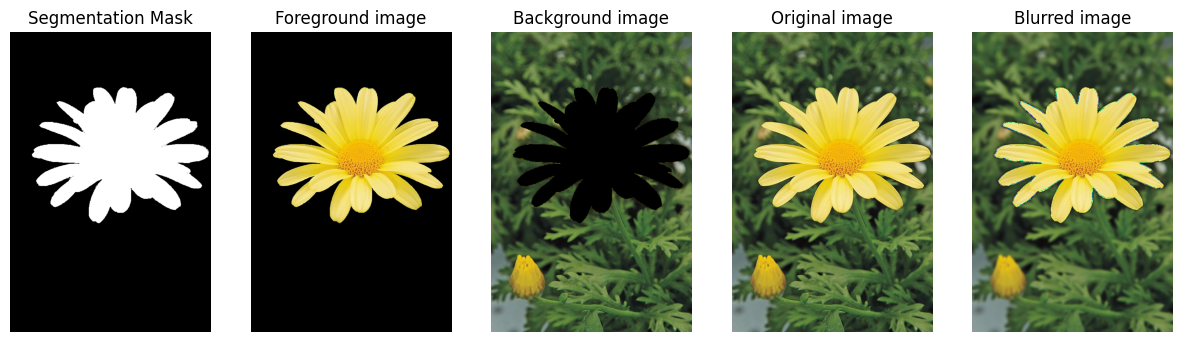

In [65]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt
img = cv.imread("daisy.jpg")
mask = np.zeros(img.shape[:2], np.uint8)
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)
rectangle = (50, 50, 505, 505)
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask1 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img1 = img * mask1[:, :, np.newaxis]
fig, ax = plt.subplots(1,5, figsize = (15,15))
ax[0].imshow(mask1, cmap='gray'), ax[0].set_title("Segmentation Mask"), ax[0].axis("off")
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), ax[1].set_title("Foreground image"), ax[1].axis("off")
cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==3)|(mask==1),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)), ax[2].set_title("Background image"), ax[2].axis("off")
ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), ax[3].set_title("Original image"), ax[3].axis('off')
#Question 7 (b)
blurred_img = img1 + cv.GaussianBlur(img2,(15,15),0)
ax[4].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB)), ax[4].set_title("Blurred image"), ax[4].axis("off")
plt.show()

When the foreground image and the blurred background image is added on top of each other the dark
(black) pixels get added up to the blurred image. Therefore the edge of the flower is somewhat dark.